# Prosper Loan Data Project

## Import Functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import mode

import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, r2_score, precision_score, f1_score
from sklearn.metrics import recall_score, accuracy_score

In [2]:
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
pd.options.display.max_columns

81

### Make Some important Functions

In [3]:
def Mode(x):
    return x.mode()[0]

def XY_Labels (a,b):
    A1 = plt.xlabel(a, fontsize = 15)
    B1 = plt.ylabel(b, fontsize = 15)
    return (A1,B1)

def label_encoder(B):
    le= preprocessing.LabelEncoder()
    return le.fit_transform(B)

## Data Wrangling

### Load and discover data

In [4]:
new_df = pd.read_csv('prosperLoanData.csv')
new_df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
print(new_df.shape)

(113937, 81)


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
print(new_df.columns)

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### drop some unnecessary columns and change some columns' types

In [8]:
new_df = new_df.drop(columns =['ListingKey', 'ProsperRating (Alpha)', 'GroupKey', 'LoanKey', 'LoanOriginationQuarter',
                               'MemberKey'])

new_df['ListingCreationDate'] = pd.to_datetime(new_df['ListingCreationDate'])
new_df['ClosedDate'] = pd.to_datetime(new_df['ClosedDate'])
new_df['DateCreditPulled'] = pd.to_datetime(new_df['DateCreditPulled'])
new_df['FirstRecordedCreditLine'] = pd.to_datetime(new_df['FirstRecordedCreditLine'])
new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

new_df.head(7)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,2,CO,Professional,Employed,44.0,False,False,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,2,MN,Executive,Employed,44.0,True,False,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-09-20,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaT,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,1,NM,Professional,Employed,82.0,True,False,2013-12-14 08:26:40.000,740.0,759.0,1973-03-01,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 75 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingNumber                        113937 non-null  int64         
 1   ListingCreationDate                  113937 non-null  datetime64[ns]
 2   CreditGrade                          28953 non-null   object        
 3   Term                                 113937 non-null  int64         
 4   LoanStatus                           113937 non-null  object        
 5   ClosedDate                           55089 non-null   datetime64[ns]
 6   BorrowerAPR                          113912 non-null  float64       
 7   BorrowerRate                         113937 non-null  float64       
 8   LenderYield                          113937 non-null  float64       
 9   EstimatedEffectiveYield              84853 non-null   float64       
 

## Clean our data

### Handling missing & Null values

In [10]:
new_df['BorrowerAPR'].fillna(new_df['BorrowerAPR'].mean(), inplace= True)
new_df['BorrowerState'].fillna(new_df['BorrowerState'].mode()[0], inplace= True)
new_df['Occupation'].fillna(new_df['Occupation'].mode()[0], inplace= True)
new_df['EmploymentStatus'].fillna(new_df['EmploymentStatus'].mode()[0], inplace= True)
new_df['CreditScoreRangeLower'].fillna(new_df['CreditScoreRangeLower'].mean(), inplace= True)
new_df['CreditScoreRangeUpper'].fillna(new_df['CreditScoreRangeUpper'].mean(), inplace= True)
new_df['CurrentCreditLines'].fillna(new_df['CurrentCreditLines'].mean(), inplace= True)
new_df['CurrentDelinquencies'].fillna(new_df['CurrentDelinquencies'].mean(), inplace= True)
new_df['AmountDelinquent'].fillna(new_df['AmountDelinquent'].mean(), inplace= True)
new_df['DebtToIncomeRatio'].fillna(new_df['DebtToIncomeRatio'].mean(), inplace= True)
new_df['ListingCreationDate'].fillna(new_df['ListingCreationDate'].mode()[0], inplace= True)
new_df['ClosedDate'].fillna(new_df['ClosedDate'].mode()[0], inplace= True)
new_df['DateCreditPulled'].fillna(new_df['DateCreditPulled'].mode()[0], inplace= True)
new_df['FirstRecordedCreditLine'].fillna(new_df['FirstRecordedCreditLine'].mode()[0], inplace= True)
new_df['LoanOriginationDate'].fillna(new_df['LoanOriginationDate'].mode()[0], inplace= True)

In [11]:
new_df['CreditGrade'].fillna('NC', inplace= True)
new_df['EstimatedEffectiveYield'].fillna(new_df['EstimatedEffectiveYield'].mean(), inplace= True)
new_df['EstimatedLoss'].fillna(new_df['EstimatedLoss'].mean(), inplace= True)
new_df['EstimatedReturn'].fillna(new_df['EstimatedReturn'].mean(), inplace= True)
new_df['ProsperRating (numeric)'].fillna(new_df['ProsperRating (numeric)'].mode()[0], inplace= True)
new_df['ProsperScore'].fillna(new_df['ProsperScore'].mode()[0], inplace= True)
new_df['EmploymentStatusDuration'].fillna(new_df['EmploymentStatusDuration'].mode()[0], inplace= True)
new_df['OpenCreditLines'].fillna(new_df['OpenCreditLines'].mode()[0], inplace= True)
new_df['TotalCreditLinespast7years'].fillna(new_df['TotalCreditLinespast7years'].mode()[0], inplace= True)
new_df['InquiriesLast6Months'].fillna(new_df['InquiriesLast6Months'].mode()[0], inplace= True)
new_df['TotalInquiries'].fillna(new_df['TotalInquiries'].mode()[0], inplace= True)
new_df['DelinquenciesLast7Years'].fillna(new_df['DelinquenciesLast7Years'].mode()[0], inplace= True)
new_df['PublicRecordsLast10Years'].fillna(new_df['PublicRecordsLast10Years'].mode()[0], inplace= True)
new_df['PublicRecordsLast12Months'].fillna(new_df['PublicRecordsLast12Months'].mode()[0], inplace= True)
new_df['RevolvingCreditBalance'].fillna(new_df['RevolvingCreditBalance'].mode()[0], inplace= True)
new_df['BankcardUtilization'].fillna(new_df['BankcardUtilization'].mean(), inplace= True)
new_df['AvailableBankcardCredit'].fillna(new_df['AvailableBankcardCredit'].mode()[0], inplace= True)
new_df['TotalTrades'].fillna(new_df['TotalTrades'].mode()[0], inplace= True)
new_df['TradesNeverDelinquent (percentage)'].fillna(new_df['TradesNeverDelinquent (percentage)'].mean(), inplace= True)
new_df['TradesOpenedLast6Months'].fillna(new_df['TradesOpenedLast6Months'].mode()[0], inplace= True)
new_df['TotalProsperLoans'].fillna(new_df['TotalProsperLoans'].mode()[0], inplace= True)
new_df['TotalProsperPaymentsBilled'].fillna(new_df['TotalProsperPaymentsBilled'].mode()[0], inplace= True)
new_df['OnTimeProsperPayments'].fillna(new_df['OnTimeProsperPayments'].mode()[0], inplace= True)
new_df['ProsperPaymentsLessThanOneMonthLate'].fillna(new_df['ProsperPaymentsLessThanOneMonthLate'].mode()[0], inplace= True)
new_df['ProsperPaymentsOneMonthPlusLate'].fillna(new_df['ProsperPaymentsOneMonthPlusLate'].mode()[0], inplace= True)
new_df['ProsperPrincipalBorrowed'].fillna(new_df['ProsperPrincipalBorrowed'].mode()[0], inplace= True)
new_df['ProsperPrincipalOutstanding'].fillna(new_df['ProsperPrincipalOutstanding'].mean(), inplace= True)
new_df['ScorexChangeAtTimeOfListing'].fillna(new_df['ScorexChangeAtTimeOfListing'].mode()[0], inplace= True)
new_df['LoanFirstDefaultedCycleNumber'].fillna(new_df['LoanFirstDefaultedCycleNumber'].mode()[0], inplace= True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 75 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingNumber                        113937 non-null  int64         
 1   ListingCreationDate                  113937 non-null  datetime64[ns]
 2   CreditGrade                          113937 non-null  object        
 3   Term                                 113937 non-null  int64         
 4   LoanStatus                           113937 non-null  object        
 5   ClosedDate                           113937 non-null  datetime64[ns]
 6   BorrowerAPR                          113937 non-null  float64       
 7   BorrowerRate                         113937 non-null  float64       
 8   LenderYield                          113937 non-null  float64       
 9   EstimatedEffectiveYield              113937 non-null  float64       
 

In [12]:
new_df['ListingCreationYear'] = new_df['ListingCreationDate'].dt.year
new_df['ListingCreationMonth'] = new_df['ListingCreationDate'].dt.month
new_df['CreditPulledYear'] = new_df['DateCreditPulled'].dt.year
new_df['CreditPulledMonth'] = new_df['DateCreditPulled'].dt.month
new_df['FirstRecordedYear'] = new_df['FirstRecordedCreditLine'].dt.year
new_df['FirstRecordedMonth'] = new_df['FirstRecordedCreditLine'].dt.month
new_df['LoanOriginationYear'] = new_df['LoanOriginationDate'].dt.year
new_df['LoanOriginationMonth'] = new_df['LoanOriginationDate'].dt.month
new_df['ClosedYear'] = new_df['ClosedDate'].dt.year
new_df['ClosedMonth'] = new_df['ClosedDate'].dt.month
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 85 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingNumber                        113937 non-null  int64         
 1   ListingCreationDate                  113937 non-null  datetime64[ns]
 2   CreditGrade                          113937 non-null  object        
 3   Term                                 113937 non-null  int64         
 4   LoanStatus                           113937 non-null  object        
 5   ClosedDate                           113937 non-null  datetime64[ns]
 6   BorrowerAPR                          113937 non-null  float64       
 7   BorrowerRate                         113937 non-null  float64       
 8   LenderYield                          113937 non-null  float64       
 9   EstimatedEffectiveYield              113937 non-null  float64       
 

In [13]:
new_df['AvgCreditScore'] = (new_df['CreditScoreRangeLower'] + new_df['CreditScoreRangeUpper'])/2
print(new_df['AvgCreditScore'].dtypes)

float64


In [14]:
Num= new_df.select_dtypes('number').columns.to_list()
Obj= new_df.select_dtypes('object').columns.to_list()

Num_df=  new_df[Num]
Obj_df= new_df[Obj]

[new_df[category].value_counts() for category in Obj]

[NC    85125
 C      5649
 D      5153
 B      4389
 AA     3509
 HR     3508
 A      3315
 E      3289
 Name: CreditGrade, dtype: int64,
 Current                   56576
 Completed                 38074
 Chargedoff                11992
 Defaulted                  5018
 Past Due (1-15 days)        806
 Past Due (31-60 days)       363
 Past Due (61-90 days)       313
 Past Due (91-120 days)      304
 Past Due (16-30 days)       265
 FinalPaymentInProgress      205
 Past Due (>120 days)         16
 Cancelled                     5
 Name: LoanStatus, dtype: int64,
 CA    20232
 TX     6842
 NY     6729
 FL     6720
 IL     5921
 GA     5008
 OH     4197
 MI     3593
 VA     3278
 NJ     3097
 NC     3084
 WA     3048
 PA     2972
 MD     2821
 MO     2615
 MN     2318
 MA     2242
 CO     2210
 IN     2078
 AZ     1901
 WI     1842
 OR     1817
 TN     1737
 AL     1679
 CT     1627
 SC     1122
 NV     1090
 KS     1062
 KY      983
 OK      971
 LA      954
 UT      877
 AR      855
 MS 

In [15]:
new_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [16]:
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [17]:
new_df['LoanCurrentDaysDelinquent'].nunique()

2411

In [18]:
Defaulted_Loan = new_df['LoanCurrentDaysDelinquent'] > 180
Nun_Defaulted_Loan = new_df['LoanCurrentDaysDelinquent'] <= 180
new_df['Defaulted_Loan'] = Defaulted_Loan
new_df['Not_Defaulted_Loan'] = Nun_Defaulted_Loan
new_df['Defaulted_Loan'].unique()

array([False,  True])

In [19]:
new_df = new_df.drop(columns =['LoanStatus'])
new_df['LoanStatus'] = Defaulted_Loan
new_df['LoanStatus'] = new_df['LoanStatus'].replace( True, 'Defaulted')
new_df['LoanStatus'] = new_df['LoanStatus'].replace( False, 'Not_Defaulted')
new_df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,...,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationMonth,CreditPulledYear,CreditPulledMonth,FirstRecordedYear,FirstRecordedMonth,LoanOriginationYear,LoanOriginationMonth,ClosedYear,ClosedMonth,AvgCreditScore,Defaulted_Loan,Not_Defaulted_Loan,LoanStatus
0,193129,2007-08-26 19:09:29.263,C,36,2009-08-14,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.0,4.0,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.000000,4.0,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.0,0.0,0.000000,1500.0,11.0,...,9.0,0.0,0.0,4000.0,2930.313906,0.0,0,8.0,78,19141,9425,2007-09-12,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,8,2007,8,2001,10,2007,9,2009,8,649.5,False,True,Not_Defaulted
1,1209647,2014-02-27 08:28:07.900,NC,36,2014-03-04,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.0,7.0,2,CO,Professional,Employed,44.0,False,False,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.000000,14.0,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.0,3989.0,0.210000,10266.0,29.0,...,9.0,0.0,0.0,4000.0,2930.313906,0.0,0,8.0,0,134815,10000,2014-03-03,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,2,2014,2,1996,3,2014,3,2014,3,689.5,False,True,Not_Defaulted
2,81716,2007-01-05 15:00:47.090,HR,36,2009-12-17,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.0,4.0,0,GA,Other,Not available,0.0,False,True,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,10.317192,7.0,3.0,0,0.0,0.0,1.0,1.0,984.507059,0.0,0.0,0.0,0.0,0.561309,0.0,17.0,...,9.0,0.0,0.0,4000.0,2930.313906,0.0,0,8.0,86,6466,3001,2007-01-17,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007,1,2007,1,2002,7,2007,1,2009,12,489.5,False,True,Not_Defaulted
3,658116,2012-10-22 11:02:35.010,NC,36,2014-03-04,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.0,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.000000,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.0,1444.0,0.040000,30754.0,26.0,...,9.0,0.0,0.0,4000.0,2930.313906,0.0,0,8.0,16,77296,10000,2012-11-01,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,10,2012,10,1983,2,2012,11,2014,3,809.5,False,True,Not_Defaulted
4,909464,2013-09-14 18:38:39.097,NC,36,2014-03-04,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.0,4.0,2,MN,Executive,Employed,44.0,True,False,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.000000,19.0,49.0,6,220.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.0,6193.0,0.810000,695.0,39.0,...,11.0,0.0,0.0,11000.0,9947.900000,0.0,0,8.0,6,102670,15000,2013-09-20,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,9,2013,9,2004,2,2013,9,2014,3,689.5,Fa

In [20]:
new_df['LoanStatus'].value_counts()

Not_Defaulted    98874
Defaulted        15063
Name: LoanStatus, dtype: int64

## Handling Outliers of the data

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtToIncomeRatio'>

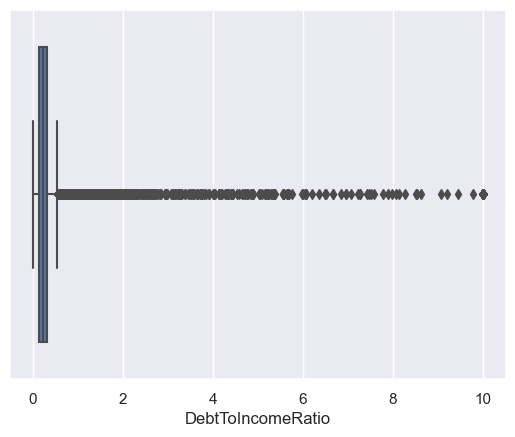

In [21]:
sns.boxplot(new_df['DebtToIncomeRatio'])

In [22]:
q1, q3 = np.percentile(new_df['DebtToIncomeRatio'], [25, 75])
iqr = q3 - q1
print("The Inter Quartile Range is: "+ str(iqr))
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = new_df[(new_df['DebtToIncomeRatio'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['DebtToIncomeRatio'])))
#print(np.sort(outliers['DebtToIncomeRatio'].unique()))
new_df = new_df[(new_df['DebtToIncomeRatio'] >= lower_bound)
                        & (new_df['DebtToIncomeRatio'] <= upper_bound)]

The Inter Quartile Range is: 0.16
The total number of outliers is: 3517


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtToIncomeRatio'>

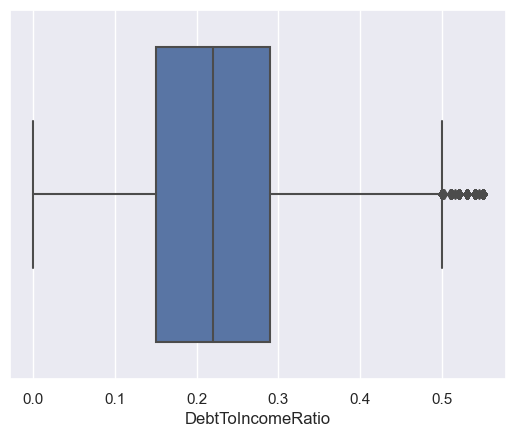

In [23]:
sns.boxplot(new_df['DebtToIncomeRatio'])

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StatedMonthlyIncome'>

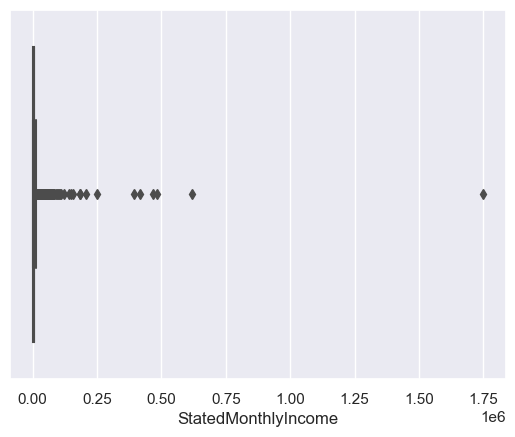

In [24]:
sns.boxplot(new_df['StatedMonthlyIncome'])

In [25]:
Q1, Q3 = np.percentile(new_df['StatedMonthlyIncome'], [25, 75])
IQR = Q3 - Q1
print("The Inter Quartile Range is: "+ str(IQR))
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)
Outliers = new_df[(new_df['StatedMonthlyIncome'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['StatedMonthlyIncome'])))
new_df = new_df[(new_df['StatedMonthlyIncome'] >= Lower_bound)
                        & (new_df['StatedMonthlyIncome'] <= Upper_bound)]

The Inter Quartile Range is: 3583.3333340000004
-2041.6666680000003
12291.666668000002
The total number of Outliers is: 5664


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StatedMonthlyIncome'>

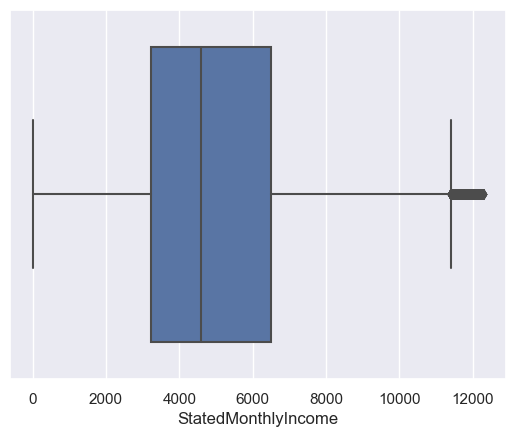

In [26]:
sns.boxplot(new_df['StatedMonthlyIncome'])

In [27]:
outliers = new_df[(new_df['DebtToIncomeRatio'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['DebtToIncomeRatio'])))
Outliers = new_df[(new_df['StatedMonthlyIncome'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['StatedMonthlyIncome'])))

The total number of outliers is: 0
The total number of Outliers is: 0


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104756 entries, 0 to 113936
Data columns (total 88 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingNumber                        104756 non-null  int64         
 1   ListingCreationDate                  104756 non-null  datetime64[ns]
 2   CreditGrade                          104756 non-null  object        
 3   Term                                 104756 non-null  int64         
 4   ClosedDate                           104756 non-null  datetime64[ns]
 5   BorrowerAPR                          104756 non-null  float64       
 6   BorrowerRate                         104756 non-null  float64       
 7   LenderYield                          104756 non-null  float64       
 8   EstimatedEffectiveYield              104756 non-null  float64       
 9   EstimatedLoss                        104756 non-null  float64       
 

In [29]:
[new_df[category].value_counts() for category in Obj]

[NC    78402
 C      5177
 D      4771
 B      3870
 HR     3382
 E      3098
 AA     3076
 A      2980
 Name: CreditGrade, dtype: int64,
 Not_Defaulted    91050
 Defaulted        13706
 Name: LoanStatus, dtype: int64,
 CA    18399
 FL     6245
 TX     6118
 NY     6076
 IL     5503
 GA     4606
 OH     3899
 MI     3360
 VA     2976
 WA     2843
 NC     2837
 NJ     2749
 PA     2744
 MD     2595
 MO     2462
 MN     2201
 MA     2046
 CO     2043
 IN     1949
 AZ     1756
 WI     1726
 OR     1715
 TN     1606
 AL     1580
 CT     1442
 SC     1026
 NV     1019
 KS      989
 KY      916
 OK      908
 LA      863
 UT      801
 AR      794
 MS      732
 NE      638
 ID      559
 NH      494
 NM      428
 RI      414
 HI      379
 WV      369
 DC      344
 MT      307
 DE      282
 VT      194
 AK      189
 SD      184
 IA      171
 WY      139
 ME       94
 ND       47
 Name: BorrowerState, dtype: int64,
 Other                                 30044
 Professional                        

In [30]:
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].replace(['Employed', 'Full-time'], 'Employed | Full-time')
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].replace(['Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired' ], 'other')
new_df['EmploymentStatus'].value_counts()

Employed | Full-time    88516
other                   16240
Name: EmploymentStatus, dtype: int64

In [31]:
new_df['IncomeRange'] = new_df['IncomeRange'].replace(['$50,000-74,999','$75,000-99,999', '$100,000+'], '$50k or above')
new_df['IncomeRange'] = new_df['IncomeRange'].replace(['Not displayed', '$1-24,999', 'Not employed', '$0', '$25,000-49,999'], 'Less than $50k')
new_df['IncomeRange'].value_counts()

$50k or above     59485
Less than $50k    45271
Name: IncomeRange, dtype: int64

In [32]:
new_df['Occupation'][new_df['Occupation']!= "Other"] = "Main Occupations"
new_df['Occupation'].value_counts()

C:\Users\WAGDY 10\AppData\Local\Temp\ipykernel_14184\2654090063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Occupation'][new_df['Occupation']!= "Other"] = "Main Occupations"


Main Occupations    74712
Other               30044
Name: Occupation, dtype: int64

# Feature Engineering

## Let's use Label Encoding & One Hot Encoder

In [33]:
new_df['BorrowerState']= label_encoder(new_df['BorrowerState'])
new_df['Occupation']= label_encoder(new_df['Occupation'])

In [34]:
Num= new_df.select_dtypes('number').columns.to_list()
Obj= new_df.select_dtypes('object').columns.to_list()

Num_df=  new_df[Num]
Obj_df= new_df[Obj]

[new_df[category].value_counts() for category in Obj]

[NC    78402
 C      5177
 D      4771
 B      3870
 HR     3382
 E      3098
 AA     3076
 A      2980
 Name: CreditGrade, dtype: int64,
 Employed | Full-time    88516
 other                   16240
 Name: EmploymentStatus, dtype: int64,
 $50k or above     59485
 Less than $50k    45271
 Name: IncomeRange, dtype: int64,
 Not_Defaulted    91050
 Defaulted        13706
 Name: LoanStatus, dtype: int64]

In [35]:
Num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104756 entries, 0 to 113936
Data columns (total 74 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        104756 non-null  int64  
 1   Term                                 104756 non-null  int64  
 2   BorrowerAPR                          104756 non-null  float64
 3   BorrowerRate                         104756 non-null  float64
 4   LenderYield                          104756 non-null  float64
 5   EstimatedEffectiveYield              104756 non-null  float64
 6   EstimatedLoss                        104756 non-null  float64
 7   EstimatedReturn                      104756 non-null  float64
 8   ProsperRating (numeric)              104756 non-null  float64
 9   ProsperScore                         104756 non-null  float64
 10  ListingCategory (numeric)            104756 non-null  int64  
 11  BorrowerState

In [36]:
new_df = pd.get_dummies(new_df, columns = ['IncomeRange','EmploymentStatus','CreditGrade'])
new_df.head()

,ListingNumber,ListingCreationDate,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,...,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationMonth,CreditPulledYear,CreditPulledMonth,FirstRecordedYear,FirstRecordedMonth,LoanOriginationYear,LoanOriginationMonth,ClosedYear,ClosedMonth,AvgCreditScore,Defaulted_Loan,Not_Defaulted_Loan,LoanStatus,IncomeRange_$50k or above,IncomeRange_Less than $50k,EmploymentStatus_Employed | Full-time,EmploymentStatus_other,CreditGrade_A,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC
0,193129,2007-08-26 19:09:29.263,36,2009-08-14,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.0,4.0,0,5,1,2.0,True,True,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.000000,4.0,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.0,0.0,0.000000,1500.0,11.0,0.810000,0.0,...,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,8,2007,8,2001,10,2007,9,2009,8,649.5,False,True,Not_Defaulted,0,1,0,1,0,0,0,1,0,0,0,0
1,1209647,2014-02-27 08:28:07.900,36,2014-03-04,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.0,7.0,2,5,0,44.0,False,False,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.000000,14.0,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.0,3989.0,0.210000,10266.0,29.0,1.000000,2.0,...,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,2,2014,2,1996,3,2014,3,2014,3,689.5,False,True,Not_Defaulted,1,0,1,0,0,0,0,0,0,0,0,1
2,81716,2007-01-05 15:00:47.090,36,2009-12-17,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.0,4.0,0,10,1,0.0,False,True,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,10.317192,7.0,3.0,0,0.0,0.0,1.0,1.0,984.507059,0.0,0.0,0.0,0.0,0.561309,0.0,17.0,0.885897,0.0,...,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007,1,2007,1,2002,7,2007,1,2009,12,489.5,False,True,Not_Defaulted,0,1,0,1,0,0,0,0,0,0,1,0
3,658116,2012-10-22 11:02:35.010,36,2014-03-04,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.0,9.0,16,10,0,113.0,True,False,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.000000,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.0,1444.0,0.040000,30754.0,26.0,0.760000,0.0,...,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,10,2012,10,1983,2,2012,11,2014,3,809.5,False,True,Not_Defaulted,0,1,1,0,0,0,0,0,0,0,0,1
4,909464,2013-09-14 18:38:39.097,36,2014-03-04,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.0,4.0,2,23,0,44.0,True,False,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.000000,19.0,49.0,6,220.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.0,6193.0,0.810000,695.0,39.0,0.950000,2.0,...,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,9,2013,9,2004,2,2013,9,2014,3,689.5,False,True,Not_Defaulted,1,0,1,0,0,0,0,0,0,0,0,1


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104756 entries, 0 to 113936
Data columns (total 97 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   ListingNumber                          104756 non-null  int64         
 1   ListingCreationDate                    104756 non-null  datetime64[ns]
 2   Term                                   104756 non-null  int64         
 3   ClosedDate                             104756 non-null  datetime64[ns]
 4   BorrowerAPR                            104756 non-null  float64       
 5   BorrowerRate                           104756 non-null  float64       
 6   LenderYield                            104756 non-null  float64       
 7   EstimatedEffectiveYield                104756 non-null  float64       
 8   EstimatedLoss                          104756 non-null  float64       
 9   EstimatedReturn                        104756 no

**Encoding Boolean features**

In [38]:
new_df['IsBorrowerHomeowner']= label_encoder(new_df['IsBorrowerHomeowner'])
new_df['CurrentlyInGroup']= label_encoder(new_df['CurrentlyInGroup'])
new_df['IncomeVerifiable']= label_encoder(new_df['IncomeVerifiable'])
new_df['Defaulted_Loan']= label_encoder(new_df['Defaulted_Loan'])

### To Handle Negative Values

In [39]:
Obj= new_df.select_dtypes('object').columns.to_list()
Obj_df= new_df[Obj]

Bool= new_df.select_dtypes('bool').columns.to_list()
Bool_df= new_df[Bool]

datetime= new_df.select_dtypes('datetime').columns.to_list()
datetime_df= new_df[datetime]

Num= new_df.select_dtypes('number').columns.to_list()
Num_df= new_df[Num]
Num_df= Num_df[Num_df >= 0]
Num_df.fillna(0, inplace= True)
Num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104756 entries, 0 to 113936
Data columns (total 90 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ListingNumber                          104756 non-null  int64  
 1   Term                                   104756 non-null  int64  
 2   BorrowerAPR                            104756 non-null  float64
 3   BorrowerRate                           104756 non-null  float64
 4   LenderYield                            104756 non-null  float64
 5   EstimatedEffectiveYield                104756 non-null  float64
 6   EstimatedLoss                          104756 non-null  float64
 7   EstimatedReturn                        104756 non-null  float64
 8   ProsperRating (numeric)                104756 non-null  float64
 9   ProsperScore                           104756 non-null  float64
 10  ListingCategory (numeric)              104756 non-null  

In [40]:
new_df = pd.concat([Obj_df, Num_df, Bool_df], axis=1)
new_df = new_df.drop(['LoanStatus'], axis= 1)
print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104756 entries, 0 to 113936
Data columns (total 91 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ListingNumber                          104756 non-null  int64  
 1   Term                                   104756 non-null  int64  
 2   BorrowerAPR                            104756 non-null  float64
 3   BorrowerRate                           104756 non-null  float64
 4   LenderYield                            104756 non-null  float64
 5   EstimatedEffectiveYield                104756 non-null  float64
 6   EstimatedLoss                          104756 non-null  float64
 7   EstimatedReturn                        104756 non-null  float64
 8   ProsperRating (numeric)                104756 non-null  float64
 9   ProsperScore                           104756 non-null  float64
 10  ListingCategory (numeric)              104756 non-null  

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,...,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationMonth,CreditPulledYear,CreditPulledMonth,FirstRecordedYear,FirstRecordedMonth,LoanOriginationYear,LoanOriginationMonth,ClosedYear,ClosedMonth,AvgCreditScore,Defaulted_Loan,IncomeRange_$50k or above,IncomeRange_Less than $50k,EmploymentStatus_Employed | Full-time,EmploymentStatus_other,CreditGrade_A,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC,Not_Defaulted_Loan
0,193129,36,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.0,4.0,0,5,1,2.0,1,1,640.0,659.0,5.000000,4.0,12.0,1,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.0,0.0,0.000000,1500.0,11.0,0.810000,0.0,0.17,1,3083.333333,1.0,...,9425,330.43,11396.14,9425.00,1971.14,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,8,2007,8,2001,10,2007,9,2009,8,649.5,0,0,1,0,1,0,0,0,1,0,0,0,0,True
1,1209647,36,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.0,7.0,2,5,0,44.0,0,0,680.0,699.0,14.000000,14.0,29.0,13,389.0,3.0,5.0,0.0,0.000000,0.0,1.0,0.0,3989.0,0.210000,10266.0,29.0,1.000000,2.0,0.18,1,6125.000000,1.0,...,10000,318.93,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,2,2014,2,1996,3,2014,3,2014,3,689.5,0,1,0,1,0,0,0,0,0,0,0,0,1,True
2,81716,36,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.0,4.0,0,10,1,0.0,0,1,480.0,499.0,10.317192,7.0,3.0,0,0.0,0.0,1.0,1.0,984.507059,0.0,0.0,0.0,0.0,0.561309,0.0,17.0,0.885897,0.0,0.06,1,2083.333333,1.0,...,3001,123.32,4186.63,3001.00,1185.63,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007,1,2007,1,2002,7,2007,1,2009,12,489.5,0,0,1,0,1,0,0,0,0,0,0,1,0,True
3,658116,36,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.0,9.0,16,10,0,113.0,1,0,800.0,819.0,5.000000,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.000000,14.0,0.0,0.0,1444.0,0.040000,30754.0,26.0,0.760000,0.0,0.15,1,2875.000000,1.0,...,10000,321.45,5143.20,4091.09,1052.11,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,10,2012,10,1983,2,2012,11,2014,3,809.5,0,0,1,1,0,0,0,0,0,0,0,0,1,True
4,909464,36,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.0,4.0,2,23,0,44.0,1,0,680.0,699.0,19.000000,19.0,49.0,6,220.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.0,6193.0,0.810000,695.0,39.0,0.950000,2.0,0.26,1,9583.333333,1.0,...,15000,563.97,2819.85,1563.22,1256.63,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,9,2013,9,2004,2,2013,9,2014,3,689.5,0,1,0,1,0,0,0,0,0,0,0,0,1,True


In [41]:
new_df.columns

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans',

In [42]:
#Removing unnecessary columns
new_df = new_df.drop(columns =['Not_Defaulted_Loan','LoanNumber','ListingNumber'])

In [43]:
new_df.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'TotalProsperPay

# Calculating Loan Tenure

In [44]:
new_df['Tenure'] = (new_df['ClosedYear'] - new_df['LoanOriginationYear'])*12 + (new_df['ClosedMonth'] - new_df['LoanOriginationMonth'])

In [45]:
new_df[['ClosedYear', 'LoanOriginationYear', 'ClosedMonth', 'LoanOriginationMonth']].describe()

,ClosedYear,LoanOriginationYear,ClosedMonth,LoanOriginationMonth
count,104756.000000,104756.000000,104756.000000,104756.000000
mean,2012.407986,2011.050689,4.620270,6.600176
std,2.170693,2.504155,2.970939,3.566112
min,2005.000000,2005.000000,1.000000,1.000000
25%,2011.000000,2008.000000,3.000000,3.000000
50%,2014.000000,2012.000000,3.000000,7.000000
75%,2014.000000,2013.000000,6.000000,10.000000
max,2014.000000,2014.000000,12.000000,12.000000


In [46]:
new_df[['Tenure', 'Term']].head(10)

,Tenure,Term
0,23,36
1,0,36
2,35,36
3,16,36
4,6,36
5,3,60
6,11,36
7,10,36
8,3,36
9,3,36


In [47]:
new_df = new_df[new_df['Tenure']>0]

In [48]:
new_df['Tenure'].describe()

count    102732.000000
mean         14.589982
std          11.209120
min           1.000000
25%           5.000000
50%          11.000000
75%          22.000000
max          51.000000
Name: Tenure, dtype: float64

# Calculating Eligible Loan Amount

In [49]:
new_df.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'TotalProsperPay

In [50]:
def eligible_loan_amnt(df):
  df['Loan_Cap'] = df['StatedMonthlyIncome'] * df['Tenure'] * 0.3
  df['Total_Loan_Amnt'] = np.round(df['LoanOriginalAmount'] + (df['LoanOriginalAmount'] * df['BorrowerRate']) *df['Tenure'])

  ELA = np.empty(0)

  for i in range(len(df['Loan_Cap'].values)):
    if df['Loan_Cap'].iloc[i] <= 0:
      ELA = np.append(ELA, 0)
    elif df['Total_Loan_Amnt'].iloc[i] <= df['Loan_Cap'].iloc[i]:
      ELA = np.append(ELA, df['Total_Loan_Amnt'].iloc[i])
    else:
      ELA = np.append(ELA, df['Loan_Cap'].iloc[i])

  df.drop(["Loan_Cap", "Total_Loan_Amnt"], axis=1, inplace=True)
  return ELA

In [51]:
new_df['ELA'] = eligible_loan_amnt(new_df)
new_df['ELA'].describe()

count    102732.000000
mean      15651.198967
std       14539.236644
min           0.000000
25%        5383.225000
50%       11250.000000
75%       21359.831250
max      133200.000000
Name: ELA, dtype: float64

In [52]:
new_df['ELA'].isnull().sum()

0

# Calculating Equated Monthly Installments (EMI):

In [53]:
new_df.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'TotalProsperPay

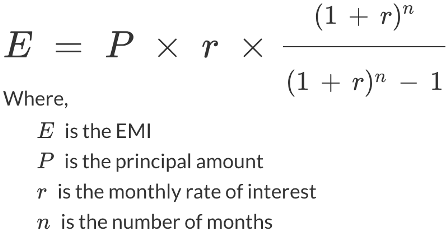

In [54]:
def cal_EMI(P, r, n):
  P = P.values
  r = r.values
  n = n.values
  #print(P.shape[0])
  result_1 = np.empty(0)
  result_2 = np.empty(0)
  result = np.empty(0)
  for i in range(P.shape[0]):
    #print(P[i])
    #print(r[i])
    #print(n[i])
    # EMI = P × r × (1 + r) ^ n / ((1 + r) ^ n – 1)
    #print(P[i] * (1 + r[i]))
    result_1 = np.append(result_1, P[i] * r[i] * np.power((1 + r[i]),n[i]))
    result_2 = np.append(result_2, np.power((1 + r[i]),n[i]) - 1)
    result = np.append(result, (result_1[i] / result_2[i]))

  return result

In [55]:
new_df["EMI"] = cal_EMI(new_df["LP_CustomerPrincipalPayments"], new_df["BorrowerRate"], new_df["Tenure"])
new_df["EMI"].describe()

C:\Users\WAGDY 10\AppData\Local\Temp\ipykernel_14184\2200793169.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result = np.append(result, (result_1[i] / result_2[i]))


count    102724.000000
mean        750.100785
std        1367.332381
min           0.000000
25%         160.583285
50%         363.914710
75%         828.445827
max       41366.500000
Name: EMI, dtype: float64

In [56]:
new_df["EMI"].isnull().sum()

8

In [57]:
#Imputing null values in EMI
new_df['EMI'].fillna(new_df['EMI'].mean(), inplace= True)
new_df["EMI"].isnull().sum()

0

# Calculating Preferred Return on Investment (PROI):

# Use of different methods of Feature Engineering

# 1.Correlation Score

In [58]:
correlations = new_df.corr()
correlations.head()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationMonth,CreditPulledYear,CreditPulledMonth,FirstRecordedYear,FirstRecordedMonth,LoanOriginationYear,LoanOriginationMonth,ClosedYear,ClosedMonth,AvgCreditScore,Defaulted_Loan,IncomeRange_$50k or above,IncomeRange_Less than $50k,EmploymentStatus_Employed | Full-time,EmploymentStatus_other,CreditGrade_A,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC,Tenure,ELA,EMI
Term,1.000000,-0.009645,0.021553,0.022093,0.058592,-0.103044,0.150206,0.082719,0.125383,0.003419,0.055763,-0.018137,0.115183,0.089444,-0.143634,0.132728,0.132728,0.083635,0.117742,0.085399,0.101808,0.105986,-0.113087,-0.101618,-0.085892,-0.017629,-0.042293,-0.029877,-0.023584,0.059790,0.032709,0.037933,0.102839,0.122996,-0.005188,0.072362,0.039730,0.099769,0.047400,0.021117,...,-0.065146,-0.125873,0.168777,-0.002212,NaN,-0.035758,-0.033394,-0.034137,-0.030056,-0.057437,-0.043411,-0.024324,-0.042721,0.347570,0.013136,0.347306,0.013793,0.001480,-0.006832,0.347032,0.008587,0.331034,-0.204302,0.132728,-0.129260,0.121834,-0.121834,0.105232,-0.105232,-0.080159,-0.081321,-0.091818,-0.106966,-0.102549,-0.081952,-0.085688,0.272501,-0.213453,-0.024123,-0.048010
BorrowerAPR,-0.009645,1.000000,0.989686,0.989191,0.766198,0.811084,0.692654,-0.817970,-0.454518,0.133474,0.023114,0.027468,0.010035,-0.129352,-0.055204,-0.425596,-0.425596,-0.100038,-0.096749,0.004644,-0.118912,-0.046468,0.149330,0.119402,0.149233,0.065745,0.165983,0.124119,0.043333,-0.046072,0.253868,-0.329993,-0.032112,-0.239054,0.113296,0.144670,-0.119426,-0.169340,-0.019324,0.009488,...,-0.114065,-0.184127,0.171196,-0.001563,NaN,0.068422,0.068590,0.027965,-0.031787,-0.044385,-0.046260,-0.033842,-0.308344,0.076206,0.054898,0.075284,0.055665,0.051480,0.002224,0.073602,0.069492,0.101655,0.028773,-0.425596,0.157132,-0.119061,0.119061,-0.032580,0.032580,-0.184789,-0.249428,-0.142016,-0.081361,0.013492,0.111867,0.118793,0.171673,0.025604,0.042347,0.015833
BorrowerRate,0.021553,0.989686,1.000000,0.999189,0.767979,0.809915,0.714641,-0.814757,-0.477230,0.103404,0.005022,0.032903,-0.014713,-0.131455,-0.003247,-0.458625,-0.458625,-0.103889,-0.110337,-0.004667,-0.136533,-0.062447,0.186241,0.156643,0.177307,0.065987,0.174210,0.129750,0.048986,-0.056667,0.247669,-0.332584,-0.045535,-0.258444,0.113506,0.130320,-0.108023,-0.182735,-0.029295,-0.003105,...,-0.084843,-0.158344,0.200657,-0.001124,NaN,0.100444,0.100207,0.041254,-0.032368,-0.031107,-0.037208,-0.028787,-0.275346,-0.017665,0.051215,-0.018665,0.051426,0.045992,0.003656,-0.020218,0.066975,0.012421,0.062929,-0.458625,0.198765,-0.143987,0.143987,-0.052872,0.052872,-0.162762,-0.226369,-0.112068,-0.050025,0.050909,0.146267,0.153043,0.080007,0.078372,0.077074,0.025158
LenderYield,0.022093,0.989191,0.999189,1.000000,0.771147,0.813207,0.717536,-0.818038,-0.478602,0.104968,0.005905,0.033186,-0.014550,-0.129960,-0.014122,-0.451381,-0.451381,-0.102677,-0.1093

In [59]:
target_correlations = correlations['Defaulted_Loan'].sort_values(ascending=False, key= abs)
print("Correlation of features with the target column:")
target_correlations.head(30)

Correlation of features with the target column:


Defaulted_Loan                        1.000000
LoanCurrentDaysDelinquent             0.819101
LP_GrossPrincipalLoss                 0.654542
LP_NetPrincipalLoss                   0.651668
LoanFirstDefaultedCycleNumber         0.619225
ClosedYear                           -0.427711
LoanMonthsSinceOrigination            0.378913
CreditPulledYear                     -0.375786
LoanOriginationYear                  -0.375721
ListingCreationYear                  -0.374945
CreditGrade_NC                       -0.342483
CreditScoreRangeLower                -0.261699
CreditScoreRangeUpper                -0.261699
AvgCreditScore                       -0.261699
ClosedMonth                           0.258724
InquiriesLast6Months                  0.246563
TotalInquiries                        0.236461
CreditGrade_HR                        0.213554
LP_NonPrincipalRecoverypayments       0.205794
CurrentDelinquencies                  0.203553
CurrentlyInGroup                      0.198814
BorrowerRate 

In [60]:
df1 = new_df[['LoanCurrentDaysDelinquent', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LoanFirstDefaultedCycleNumber', 'ClosedYear',
'LoanMonthsSinceOrigination', 'CreditPulledYear', 'LoanOriginationYear', 'ListingCreationYear', 'CreditGrade_NC', 'CreditScoreRangeLower',
'CreditScoreRangeUpper', 'AvgCreditScore', 'ClosedMonth', 'InquiriesLast6Months', 'TotalInquiries', 'CreditGrade_HR', 'LP_NonPrincipalRecoverypayments',
'CurrentDelinquencies', 'BorrowerRate', 'CurrentlyInGroup', 'LenderYield', 'TradesNeverDelinquent (percentage)', 'BorrowerAPR', 'ProsperScore',
'CreditGrade_E', 'EstimatedReturn', 'IncomeRange_$50k or above', 'IncomeRange_Less than $50k', 'Defaulted_Loan']].copy()

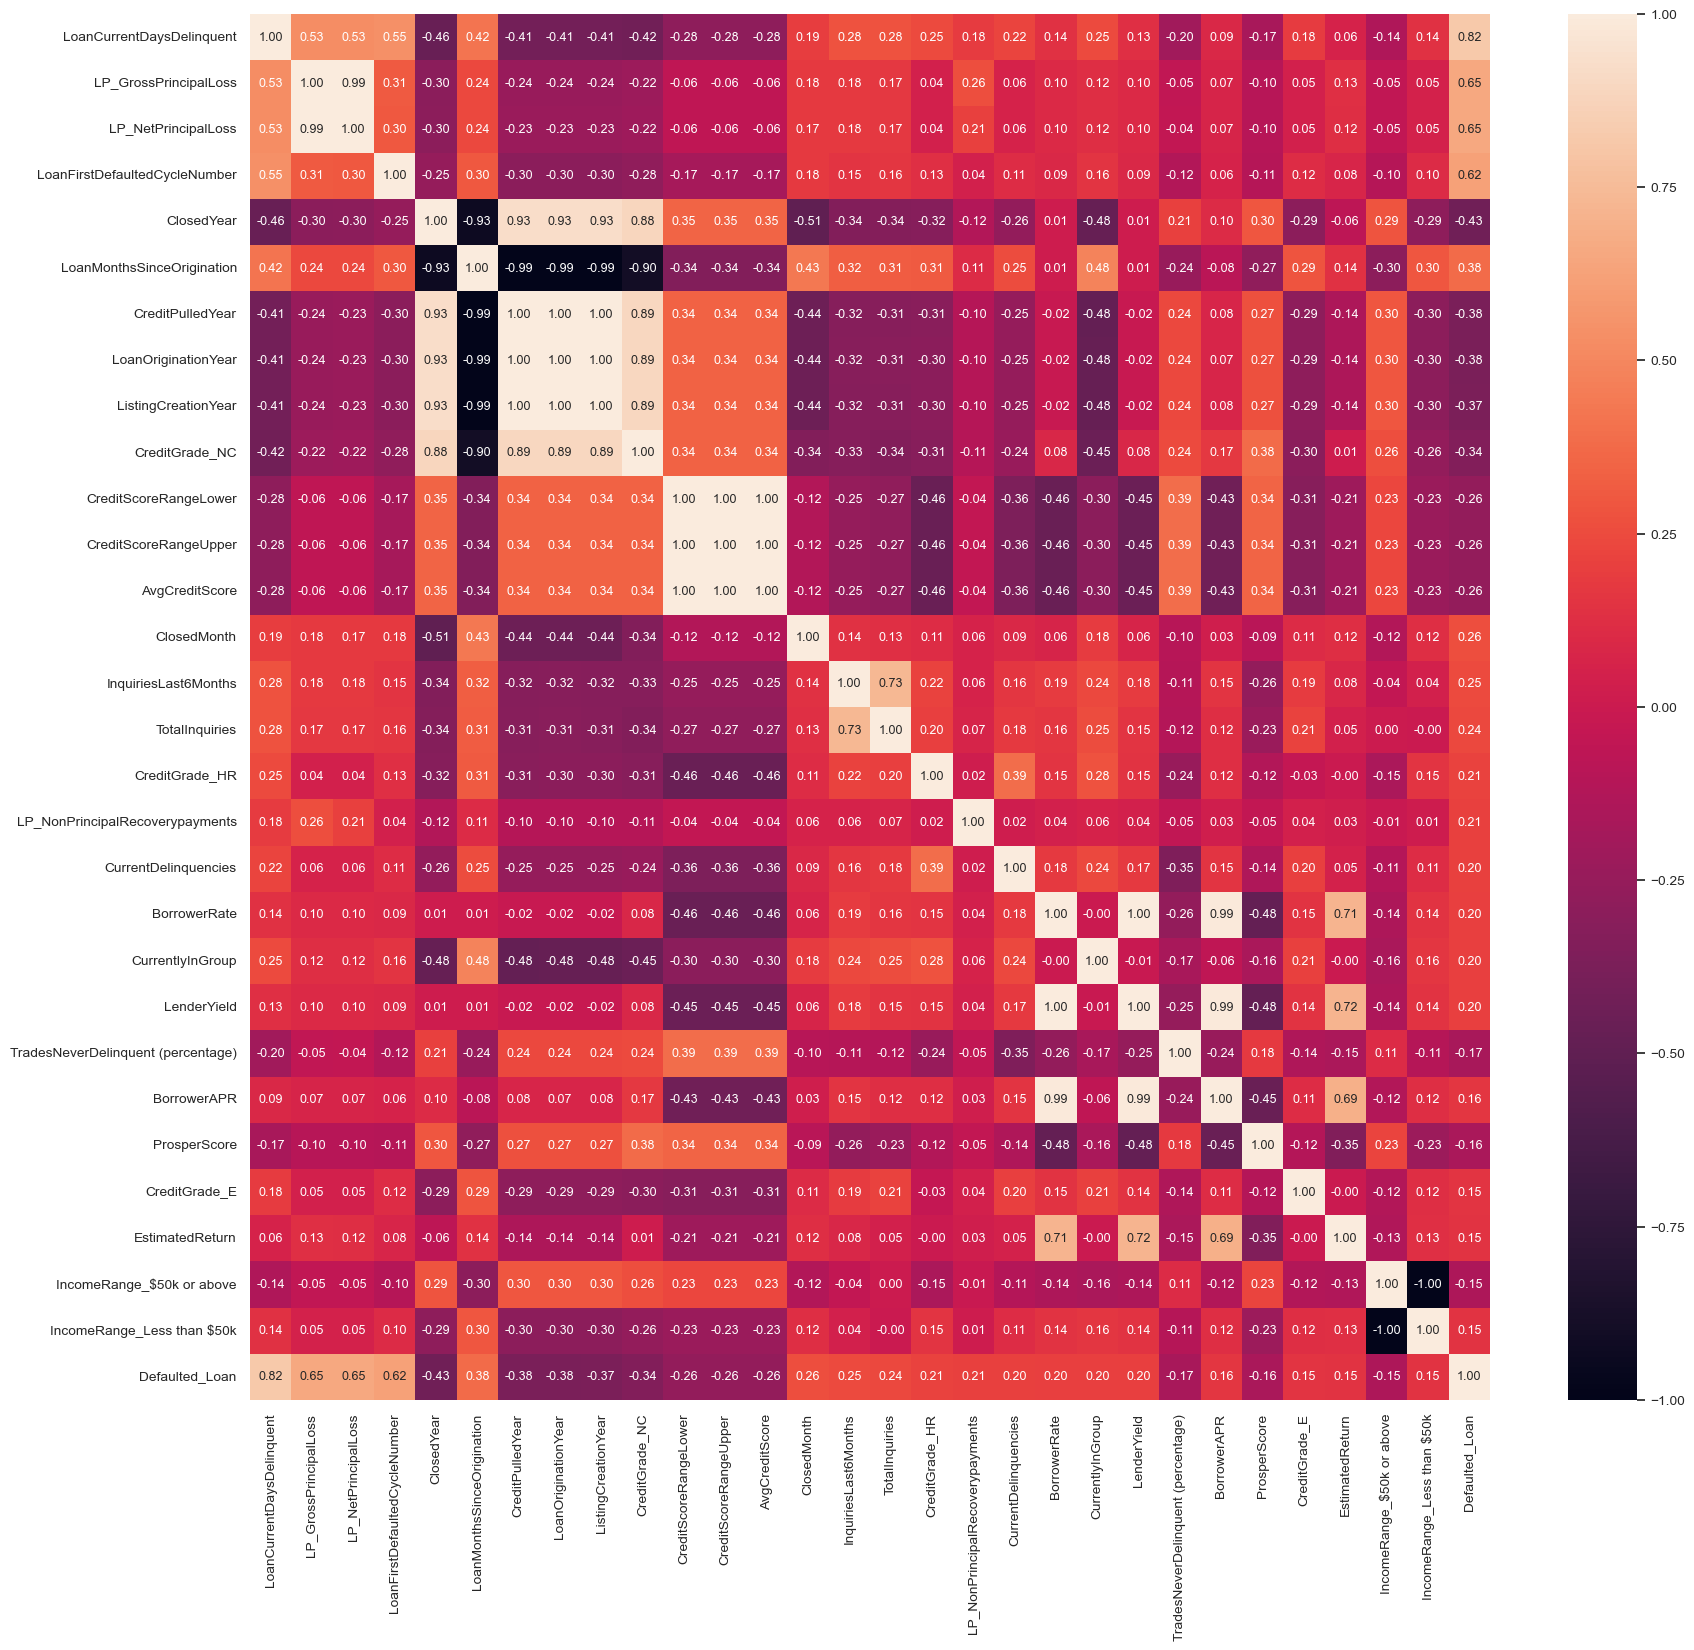

In [61]:
corr1= df1.corr()
plt.figure(figsize=(20,18))
sns.set(font_scale = 0.9)
sns.heatmap(df1.corr(), annot=True, annot_kws={'size': 9}, fmt= '.2f')
plt.show()

**Selecting top 20 features as per correlation scores**

In [62]:
Y = new_df[['Defaulted_Loan']].copy()
X = new_df.drop(columns =['Defaulted_Loan'])

# 3.Select K-Best Model

In [63]:
bestfeatures = SelectKBest (score_func=chi2, k=20)
fit= bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', "Score"]
featureScores = featureScores.sort_values('Score', ascending=False)

In [64]:
featureScores.head(10)

,Specs,Score
56,LP_GrossPrincipalLoss,3.399407e+08
57,LP_NetPrincipalLoss,3.372594e+08
46,LoanCurrentDaysDelinquent,9.790219e+07
31,AvailableBankcardCredit,2.919159e+07
29,RevolvingCreditBalance,1.294766e+07
58,LP_NonPrincipalRecoverypayments,1.275085e+07
52,LP_CustomerPrincipalPayments,9.824610e+06
51,LP_CustomerPayments,7.380221e+06
49,LoanOriginalAmount,6.726941e+06
89,EMI,3.534617e+06


# 4. ExtraTreesClassifier Model

In [65]:
model = ExtraTreesClassifier()
model.fit(X,Y)
XM1 = model.feature_importances_
feat_importances = pd.Series(XM1, index= X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

C:\Users\WAGDY 10\AppData\Local\Temp\ipykernel_14184\1317912168.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


In [66]:
feat_importances.head(10)

LoanCurrentDaysDelinquent        0.290926
LP_GrossPrincipalLoss            0.146401
LP_NetPrincipalLoss              0.127781
LoanFirstDefaultedCycleNumber    0.125115
ClosedYear                       0.030154
LP_CustomerPrincipalPayments     0.021800
CreditGrade_NC                   0.017911
ClosedMonth                      0.016295
LoanMonthsSinceOrigination       0.015867
ListingCreationYear              0.013933
dtype: float64

Text(0.5, 1.0, 'Correlation of target Column')

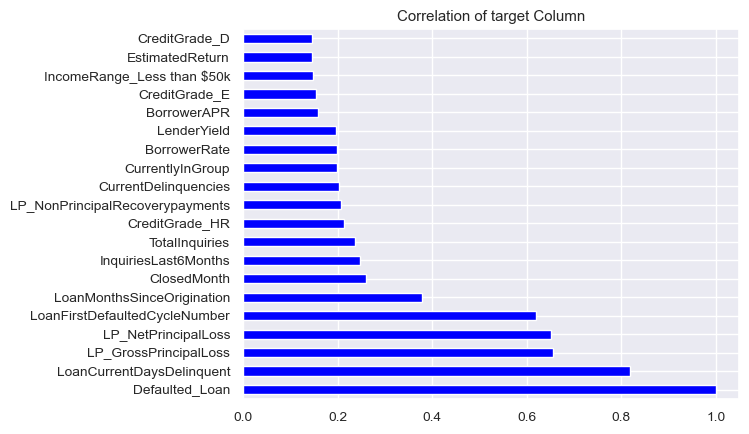

In [67]:
# Plot precision
target_correlations.nlargest(20).plot(kind='barh', color = 'blue')
plt.title("Correlation of target Column")

# Calculcating PROI

In [68]:
def PROI(df):
    # Calculate ROI
    df['InterestAmount'] = (df['LoanOriginalAmount']*(df['BorrowerRate']))
    df['TotalAmount'] = (df['InterestAmount'] + df['LoanOriginalAmount'])
    df['ROI'] = (df['InterestAmount'] / df['TotalAmount'])
    print(df['ROI'].describe())
    
    # Setting PROI
    df['PROI'] = df['ROI'].median()
    for i in range(df.shape[0]):
        # Check out LP_CustomerPrinciplePayment
        if df['LP_CustomerPrincipalPayments'].iloc[i] <= 1000:
            df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
        elif (df['LP_CustomerPrincipalPayments'].iloc[i] > 2000) & (df['LP_CustomerPrincipalPayments'].iloc[i] <= 10500):
            df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
        elif (df['LP_CustomerPrincipalPayments'].iloc[i] > 10500):
            df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.1
        # Check out ProsperRating
        if df['ProsperRating (numeric)'].iloc[i] in [2, 3]:
            df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
        elif df['ProsperRating (numeric)'].iloc[i] == 6:
            df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
        # Check out LoanOriginalAmount
        if df['LoanOriginalAmount'].iloc[i] <= 2000:
            df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
        elif (df['LoanOriginalAmount'].iloc[i] > 19500) & (df['LoanOriginalAmount'].iloc[i] <= 25500):
            df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
        elif df['LoanOriginalAmount'].iloc[i] > 25500:
            df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.1
        # Check out LoanCurrentDaysDelinquent
        if (df['LoanCurrentDaysDelinquent'].iloc[i] >= 50):
            df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
        # Check out MonthlyLoanPayment
        if (df['MonthlyLoanPayment'].iloc[i] <= 90):
            df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
        elif (df['MonthlyLoanPayment'].iloc[i] <= 750) & (df['MonthlyLoanPayment'].iloc[i] > 360):
            df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
    
    print(df['ROI'].describe())
    return df['PROI']

In [69]:
new_df.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'TotalProsperPay

In [70]:
new_df['PROI'] = PROI(new_df)

count    102732.000000
mean          0.158963
std           0.052003
min           0.000000
25%           0.118943
50%           0.155762
75%           0.200639
max           0.332220
Name: ROI, dtype: float64


C:\Users\WAGDY 10\AppData\Local\Temp\ipykernel_14184\1551693325.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
C:\Users\WAGDY 10\AppData\Local\Temp\ipykernel_14184\1551693325.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
C:\Users\WAGDY 10\AppData\Local\Temp\ipykernel_14184\1551693325.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

count    102732.000000
mean          0.158963
std           0.052003
min           0.000000
25%           0.118943
50%           0.155762
75%           0.200639
max           0.332220
Name: ROI, dtype: float64


## Let's make a new dataframe with the best features for target column

In [71]:
FE_df = new_df[['Defaulted_Loan', 'LoanCurrentDaysDelinquent', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'ClosedMonth', 'InquiriesLast6Months', 'TotalInquiries',
'CreditGrade_HR', 'LP_NonPrincipalRecoverypayments', 'CurrentDelinquencies', 'BorrowerRate', 'CurrentlyInGroup',
'AvailableBankcardCredit', 'RevolvingCreditBalance', 'LP_CustomerPrincipalPayments', 'LoanOriginalAmount',
'LP_CustomerPayments', 'StatedMonthlyIncome', 'AmountDelinquent', 'ProsperPrincipalBorrowed', 'LoanMonthsSinceOrigination',
'OpenRevolvingMonthlyPayment', 'InvestmentFromFriendsAmount', 'EmploymentStatusDuration', 'LoanFirstDefaultedCycleNumber',
'MonthlyLoanPayment', 'ListingCreationYear']].copy()

In [72]:
FE_df.duplicated().sum()

743

In [73]:
FE_df = FE_df.drop_duplicates()
FE_df.duplicated().sum()

0

In [74]:
FE_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101989 entries, 0 to 113936
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Defaulted_Loan                   101989 non-null  int64  
 1   LoanCurrentDaysDelinquent        101989 non-null  int64  
 2   LP_GrossPrincipalLoss            101989 non-null  float64
 3   LP_NetPrincipalLoss              101989 non-null  float64
 4   LoanFirstDefaultedCycleNumber    101989 non-null  float64
 5   LoanMonthsSinceOrigination       101989 non-null  int64  
 6   ClosedMonth                      101989 non-null  int64  
 7   InquiriesLast6Months             101989 non-null  float64
 8   TotalInquiries                   101989 non-null  float64
 9   CreditGrade_HR                   101989 non-null  uint8  
 10  LP_NonPrincipalRecoverypayments  101989 non-null  float64
 11  CurrentDelinquencies             101989 non-null  float64
 12  Bo

# Selecting Targets for our multi regressor

In [75]:
y1 = new_df["Defaulted_Loan"]
y2 = new_df[['PROI', 'EMI', 'ELA']]
x = new_df.drop(['EMI', 'ELA', 'PROI','Defaulted_Loan'], axis=1)

Scaling the data

In [76]:
Scaler = StandardScaler()
x = Scaler.fit_transform(x)
y2 = Scaler.fit_transform(y2)

**Spiliting data into training and testing sets**

In [77]:
x_train, x_test, y2_train, y2_test = train_test_split(x, y2, random_state=0, test_size = .80)

# Implementing Multi Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y2_train)
y_pred_lin = lin_reg.predict(x_test)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y2_test, y_pred_lin))
print('R2_score : ', r2_score(y2_test, y_pred_lin))

Model Evaluation:
mean_squared_error :  0.3024331727730824
R2_score :  0.6981177365914961


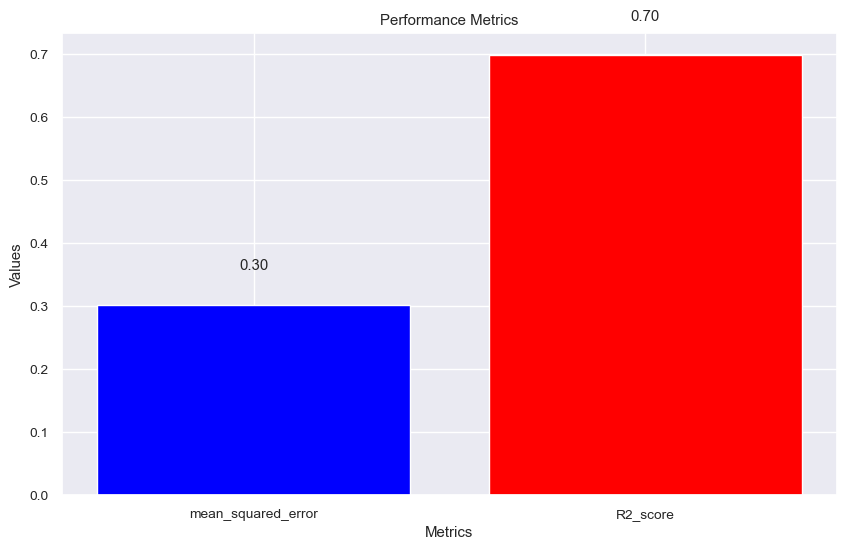

In [80]:
metrics = ['mean_squared_error', 'R2_score']
values = [0.3024308835059925, 0.6981200047340564]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'red', 'green'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

for i, value in enumerate(values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

plt.show()

(Text(0.5, 0, 'Predicted Y'), Text(0, 0.5, 'Actual Y'))

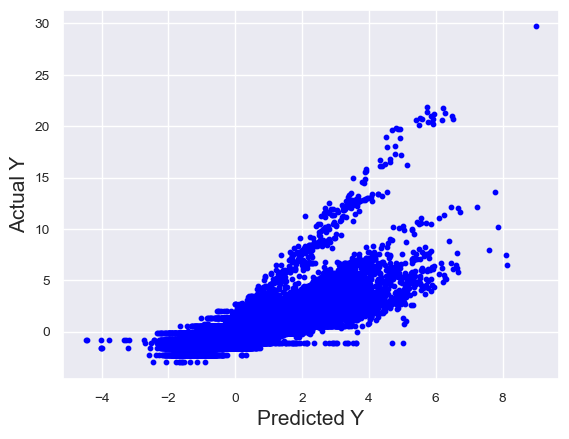

In [81]:
plt.scatter(y_pred_lin, y2_test, c ="blue", s = 10)
XY_Labels ("Predicted Y", "Actual Y")

C:\Users\WAGDY 10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


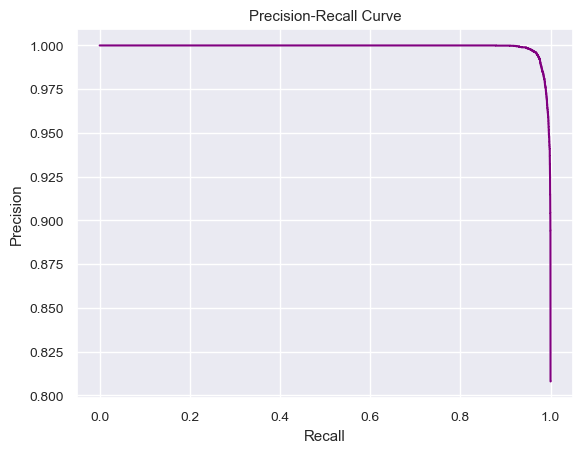

In [82]:
from sklearn.metrics import precision_recall_curve

#split dataset into training and testing set
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, random_state=0, test_size = .80)

#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(x_train, y1_train)

#use logistic regression model to make predictions
y_score = classifier.predict_proba(x_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y1_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [83]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression())
        ])
        
# Fit the pipeline on the training data
pipeline.fit(x_train, y1_train)
# Predict the target values for the test data
y_pred = pipeline.predict(x_test)

C:\Users\WAGDY 10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
